# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [3]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
pd.read_csv('NorthCallCenter.csv')
pd.read_csv('SouthCallCenter.csv')

# Create two new dataframes
df_north = pd.read_csv('NorthCallCenter.csv')
df_south = pd.read_csv('SouthCallCenter.csv')
df_north.head()
df_north.tail()
df_south.head()
df_south.tail()
df_north.head()


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [4]:
#Code Used:
df_north['Rep ID'].isnull().sum()
df_north['Rep ID'].nunique()

9

#### EDA Question 1B:  How many reps are in the South branch?  

In [5]:
#Code Used:
df_south['Rep ID'].isnull().sum()
df_south['Rep ID'].nunique()

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [6]:
#Code Used:
df_north_2 = df_north[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']]
df_north_2.describe()


,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time
count,245.000000,245.000000,82.000000,245.000000
mean,9.987755,1.914286,3.048780,2.967347
std,1.403980,0.771416,1.456382,0.843827
min,8.000000,1.000000,1.000000,2.000000
25%,9.000000,1.000000,2.000000,2.000000
50%,10.000000,2.000000,3.000000,3.000000
75%,11.000000,3.000000,4.000000,4.000000
max,12.000000,3.000000,5.000000,4.000000


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [7]:
#Code Used:
df_south_2 = df_south[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']]
df_south_2.describe()

,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time
count,314.00000,314.000000,126.000000,314.000000
mean,10.05414,1.910828,3.000000,3.076433
std,1.40751,0.860016,1.308434,0.819424
min,8.00000,1.000000,1.000000,2.000000
25%,9.00000,1.000000,2.000000,2.000000
50%,10.00000,2.000000,3.000000,3.000000
75%,11.00000,3.000000,4.000000,4.000000
max,12.00000,3.000000,5.000000,4.000000


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [8]:
# Code Used
df_north_3 = df_north[['Time Block', 'Calls']].set_index('Time Block')
df_south_3 = df_south[['Time Block', 'Calls']].set_index('Time Block')

In [9]:
df_north_south = [df_north_3, df_south_3]
df_north_south
total = pd.concat(df_north_south)
total_calls = total.groupby('Time Block')

In [10]:
total_calls.count()

,Calls
Time Block,
10:00 AM,99
11:00 AM,56
12:00 PM,120
1:00 PM,40
2:00 PM,65
3:00 PM,73
4:00 PM,53
5:00 PM,43
9:00 AM,10


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.00
> - Not Ready Minutes = 2.00
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 3.00
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 2.00
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: We MNAR, the Incoming Wait Time has 351 nan values due to call type is outgoing, therefore no incoming wait time. I would leave as nan but with an explantion.

In [11]:
# Code Used
# Add Additional Cells as needed.
#Combined & created new df for initial dc
df_both = [df_north, df_south] 
df_north_south_centers = pd.concat(df_both)
df_north_south_centers.info()
#Incoming Wait Time has 351 nulls, deeper dive

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             559 non-null    int64  
 1   Branch                 559 non-null    object 
 2   Call Purpose           559 non-null    object 
 3   Time Block             559 non-null    object 
 4   Incoming or Outgoing   559 non-null    object 
 5   Queue                  559 non-null    object 
 6   Rep ID                 559 non-null    object 
 7   Sale                   559 non-null    object 
 8   Lost Call              559 non-null    int64  
 9   Abandoned              559 non-null    int64  
 10  Busy Minutes           559 non-null    int64  
 11  Not Ready Minutes      559 non-null    int64  
 12  Incoming Wait Time     208 non-null    float64
 13  During Call Wait Time  559 non-null    int64  
 14  Calls                  559 non-null    int64  
dtypes: flo

In [12]:
df2 = df_north_south_centers[df_north_south_centers['Incoming Wait Time'].isnull()]
df2
#Possibly null due to call type is "Outgoing"
df_north_south_centers["Incoming or Outgoing"].describe()
#Exactly 351 outgoing, equal to sum of nulls
df_north_south_centers


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer:The seperate YES values are caused by a space. I used the str.replace method.

In [13]:
#Code Used
# Add Additional Cells as needed.
#Access "Sale" column for more info
df_north['Sale'].unique()
#replace " "
df_north['Sale'] = df_north['Sale'].str.replace(" ", "")
df_north['Sale'].unique()

array(['NO', 'YES'], dtype=object)

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: No

In [14]:
#Code Used
# Add Additional Cells as needed.
df_north_south_centers.duplicated().sum()
df_north.duplicated().sum()
df_south.duplicated().sum()

0

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: I dropped the Unnamed column imported at initial upload of csv, other than that, I think all data is necessary.

In [15]:
#Code Used
# Add Additional Cells as needed.
#Reviewing both datasets again, using .head()

#Unnamed column imported and reflects index, unnecessary
# df_north = df_north.drop("Unnamed: 0", axis=1)
# df_south = df_south.drop("Unnamed: 0", axis=1)
df_south
df_north


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [16]:
# Create dataframe for the entire company named df

df_1 = [df_north, df_south]
df = pd.concat(df_1)
df.columns
df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent
- South Branch = Eric


In [17]:
# Code Used
# Add Additional Cells as needed.

#Groupby on 'rep id' and included 'branch' for more insight
rep_id_group = df.groupby(['Rep ID', 'Branch'])

In [18]:
#Used sum() to get totals for int. col' and sorted to organize values
rep_id_group.sum().sort_values(by=['Calls'])

C:\Users\vanes\AppData\Local\Temp\ipykernel_32116\2236776116.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rep_id_group.sum().sort_values(by=['Calls'])


,,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,Branch,,,,,,,,
Alice,South,3637,0,0,199,46,15.0,58,20
Amanda,North,2666,0,1,229,43,12.0,60,23
Andy,North,2494,0,3,228,43,36.0,65,23
Cam,North,2746,1,0,233,46,32.0,66,24
Xander,North,3340,1,0,244,44,20.0,68,24
Sharon,South,4226,1,1,257,38,29.0,77,25
Josh,South,3960,3,0,260,50,31.0,83,26
Susan,South,4006,2,0,267,53,35.0,88,26
Joe,North,3178,0,0,256,49,36.0,81,26


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 3%
- South Branch =1% 
- Company Wide =2%
- Do any of these fall out of the optimal range of 2-5%? Yes

In [19]:
# Code Used
# Add Additional Cells as needed.
#Created two new variables to hold sums for "abandon" and "calls" columns. Abandon rate = #of abandon/ #of calls
sum_1 = df_north["Abandoned"].sum()
sum_2 = df_north["Calls"].sum()
sum_1/sum_2

0.02857142857142857

In [20]:
#Created two new variables to hold sums for "abandon" and "calls" columns. Abandon rate = #of abandon/ #of calls
south_1 = df_south["Abandoned"].sum()
south_2 = df_south["Calls"].sum()
south_1/south_2


0.012738853503184714

In [21]:
#Created two new variables to hold sums for "abandon" and "calls" columns. Abandon rate = #of abandon/ #of calls
company_rate_1 = df["Abandoned"].sum()
company_rate_2 = df["Calls"].sum()
company_rate_1/company_rate_2


0.01967799642218247

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 33/82 calls answered in 2 seconds:40%
- South Branch = 48/126 calls answered in 2 seconds:39%
- Company Wide =81/208 calls answered in 2 seconds:39% 

In [22]:
#Accessing total number of Incoming calls answered <=2 sec and creating  variable to hold data

sl_north = df_north.loc[(df_north['Incoming Wait Time']<=2) & (df_north['Incoming or Outgoing']=="Incoming")]
total_north = sl_north['Calls'].sum().astype(int)
total_north

33

In [23]:
#Accessing total number of Incoming calls and creating varible to hold data

sl_north_2 = df_north.loc[(df_north['Incoming or Outgoing']=="Incoming")]
total_north_2 = sl_north_2['Calls'].sum().astype(int)
total_north_2

82

In [24]:
#Dividing number of calls answered<=2 / total incoming calls * 100

(total_north/total_north_2)*100

40.243902439024396

In [25]:
sl_south = df_south.loc[(df_south['Incoming Wait Time']<=2) & (df_south['Incoming or Outgoing']=="Incoming")]
total_south = sl_south['Calls'].sum().astype(int)
total_south

48

In [26]:
#Accessing total number of Incoming calls and creating varible to hold data

sl_south_2 = df_south.loc[(df_south['Incoming or Outgoing']=="Incoming")]
total_south_2 = sl_south_2['Calls'].sum().astype(int)
total_south_2

126

In [27]:
(total_south/total_south_2)*100

38.095238095238095

In [28]:
# Code Used
# Add Additional Cells as needed.

#Accessing total number of Incoming calls answered <=2 sec and creating  variable to hold data

sl_1 = df.loc[(df['Incoming Wait Time']<=2) & (df['Incoming or Outgoing']=="Incoming")]
total_1 = sl_1['Calls'].sum().astype(int)
total_1

81

In [29]:
#Accessing total number of Incoming calls and creating varible to hold data

sl_2 = df.loc[(df['Incoming or Outgoing']=="Incoming")]
total_2 = sl_2['Calls'].sum().astype(int)
total_2

208

In [30]:
#Dividing number of calls answered<=2 / total incoming calls * 100

(total_1/total_2)*100


38.94230769230769

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.0
- Company Wide in seconds = 3.02


In [31]:
asa_north = df_north.groupby('Branch')["Incoming Wait Time"].mean()
asa_north

Branch
North    3.04878
Name: Incoming Wait Time, dtype: float64

In [32]:
asa_south = df_south.groupby('Branch')["Incoming Wait Time"].mean()
asa_south


Branch
South    3.0
Name: Incoming Wait Time, dtype: float64

In [33]:
asa_ns = df['Incoming Wait Time'].mean()
asa_ns


3.019230769230769

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

C:\Users\vanes\AppData\Local\Temp\ipykernel_32116\1446863311.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  queue_dict = df.groupby("Queue").agg("sum")


<Axes: xlabel='Queue'>

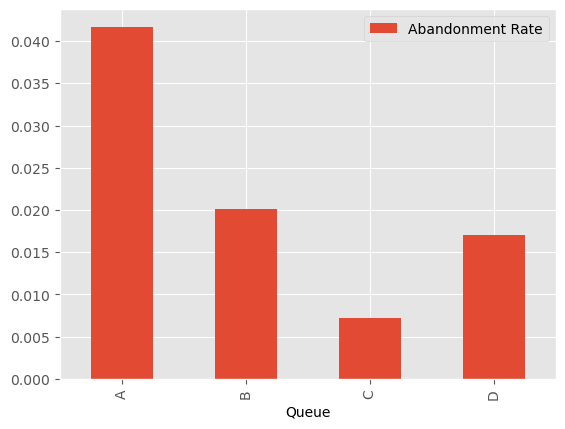

In [95]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import seaborn as np
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('ggplot')




# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}

queues = ["A", "B", "C", "D"]

queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 


    #Your Code Here:
queues_df = pd.DataFrame({'Queue':abandonment_rates.keys(), 'Abandonment Rate':abandonment_rates.values()})
queues_df.plot(kind='bar',x='Queue')





#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: I used a line chart to show the variations of wait times for each rep, this highlights top performers.
I used horzontial bar graph to display at a quick glance those with hugh performing service levels.

<Axes: ylabel='Rep ID'>

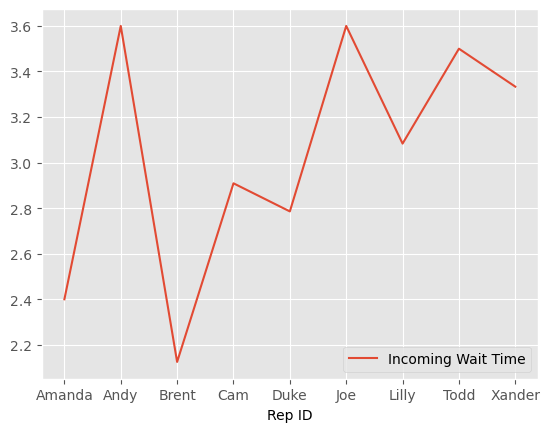

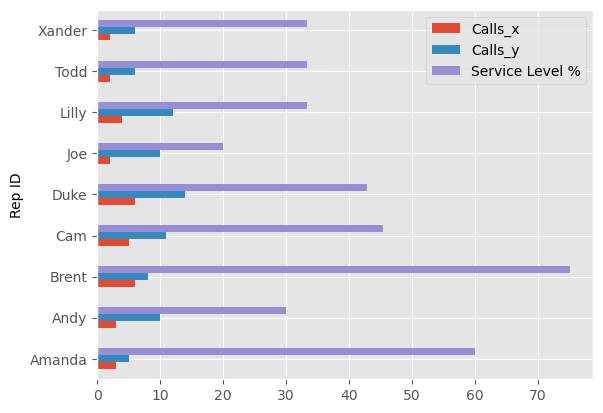

In [157]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = df_north.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()


# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = df_north[df_north["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = df_north[df_north["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100



#Your Code Here:
north_plt.plot(kind='line', x='Rep ID')
service_level.plot(kind='barh')



###### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:


> Chart style you chose and why: I used bar charts to easily and simply compare Incoming vs Outgoing calls for each call purpose.

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64
{'Outgoing': 123, 'Incoming': 75}


<Axes: xlabel='Product Support', ylabel='Number of Calls'>

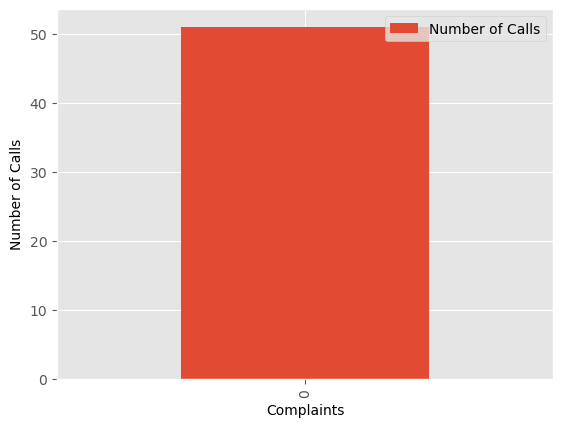

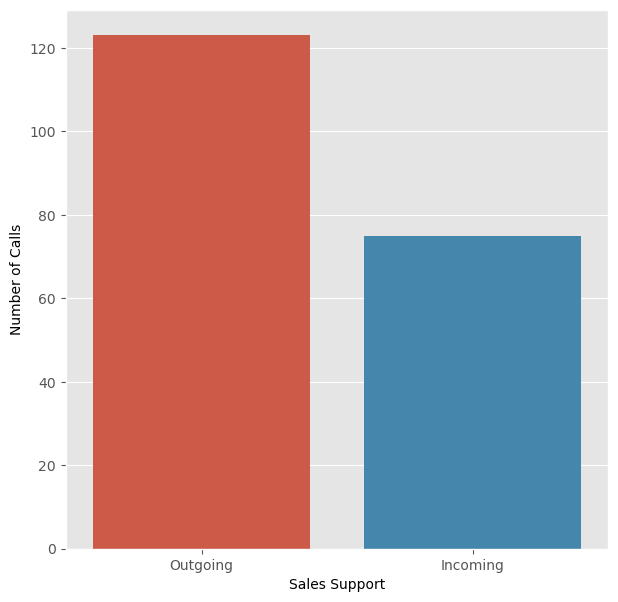

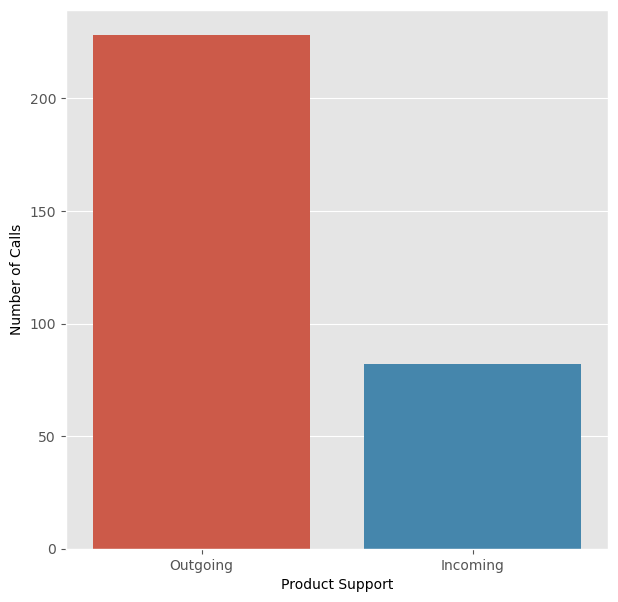

In [253]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
print(sales_support)
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

# queues_df = pd.DataFrame({'Queue':abandonment_rates.keys(), 'Abandonment Rate':abandonment_rates.values()})
# queues_df.plot(kind='bar',x='Queue')

#Your Code Here:
df_complaints = pd.DataFrame({'Complaints':complaints.keys(), 'Number of Calls':complaints.values()})
df_complaints.plot.bar( xlabel= 'Complaints', ylabel= 'Number of Calls')

df_sales = pd.DataFrame({'Sales Support':sales_support.keys(), 'Number of Calls':sales_support.values()})
plt.figure(figsize=(7,7))
bar1 = np.barplot(x='Sales Support', y='Number of Calls', data=df_sales)

df_product = pd.DataFrame({'Product Support':product_support.keys(), 'Number of Calls':product_support.values()})
plt.figure(figsize=(7,7))
np.barplot(x='Product Support', y='Number of Calls', data=df_product)





<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: I would say the South Branch is more efficient due to their average speed of answer and abandonment rate performance.



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: Both centers rep's work quickly,maybe splitting the reps between both centers would continue a balanced performance.



#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: Average handle time  target and performance for each agent would help to clarify which center is more effcient.


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: